### Which variables will best predict high programming density "in town"?
In this notebook, we aim to understand how different variables influence the density of programmers in a town. This involves studying the relationship between programming density and various factors such as Gross Domestic Product (GDP), population dynamics and programming level between years 2008 - 2020

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
import numpy as np
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Opening and reading the file
path = os.path.join("FINAL_no_TR.xlsx")
FINAL_no_TR = pd.read_excel(path)

FINAL_no_TR.head()

,year,nuts3_name,country,questioncount,answercount,upvotecount,downvotecount,commentcount,nuts3_code,EMP (THS),GDP (MIO_EUR),GVA (MIO_EUR),POP (THS)
0,2008,Aargau,CH,86,167,0,0,32,CH033,349.067,24942.455371,23931.324019,586.60
1,2009,Aargau,CH,370,2291,4158,265,3282,CH033,349.067,25582.147076,24614.963819,595.84
2,2010,Aargau,CH,1658,4073,12602,474,7459,CH033,349.067,28422.113810,27311.621095,604.17
3,2011,Aargau,CH,1876,6039,16410,2362,13563,CH033,348.695,32557.042431,31336.257699,614.88
4,2012,Aargau,CH,3226,6260,24401,4175,18513,CH033,355.344,33443.246005,32261.320850,622.82


In [4]:
# Assign weights
weights = {'questions': 0.4, 'answers': 0.4, 'comments': 0.1, 'upvotes': 0.05, 'downvotes': 0.05}

FINAL_no_TR['activity'] = (FINAL_no_TR['questioncount']*weights['questions'] + 
                          FINAL_no_TR['answercount']*weights['answers'] + 
                          FINAL_no_TR['commentcount']*weights['comments'] + 
                          FINAL_no_TR['upvotecount']*weights['upvotes'] + 
                          FINAL_no_TR['downvotecount']*weights['downvotes'])

This is the definition of programmers copied from the notebook "Programming Density in Towns" that we will use here.

In [5]:
#Defining number of programmers in each region based on the assumption made

weeks_in_year = 52
months_in_year = 12

#Experts in Region 
FINAL_no_TR["Experts"] = (FINAL_no_TR["answercount"] / (weeks_in_year*2))

#Innovators in Region
FINAL_no_TR["Innovators"] = FINAL_no_TR["questioncount"] / months_in_year

# Late Adopters in Region
FINAL_no_TR["Late_Adopters"] = ((FINAL_no_TR["upvotecount"] +  FINAL_no_TR["downvotecount"] + FINAL_no_TR["commentcount"])/ (months_in_year*15))

#Delete unnecessary columns and sum up all Developers
FINAL_no_TR.drop(columns = ["answercount", "questioncount", "upvotecount", "downvotecount", "commentcount"])
FINAL_no_TR["Programmers_Total"] = FINAL_no_TR["Experts"] + FINAL_no_TR["Innovators"] + FINAL_no_TR["Late_Adopters"] 

FINAL_no_TR['Programming_Density'] = FINAL_no_TR['Programmers_Total'] / (FINAL_no_TR['POP (THS)'] * 1000)
FINAL_no_TR.drop(columns = ["answercount", "questioncount", "upvotecount", "downvotecount", "commentcount"])

FINAL_no_TR['GDP_per_capita'] = FINAL_no_TR['GDP (MIO_EUR)'] / FINAL_no_TR['POP (THS)']

FINAL_no_TR

,year,nuts3_name,country,questioncount,answercount,upvotecount,downvotecount,commentcount,nuts3_code,EMP (THS),GDP (MIO_EUR),GVA (MIO_EUR),POP (THS),activity,Experts,Innovators,Late_Adopters,Programmers_Total,Programming_Density,GDP_per_capita
0,2008,Aargau,CH,86,167,0,0,32,CH033,349.067,24942.455371,23931.324019,586.60,104.40,1.605769,7.166667,0.177778,8.950214,0.000015,42.520381
1,2009,Aargau,CH,370,2291,4158,265,3282,CH033,349.067,25582.147076,24614.963819,595.84,1613.75,22.028846,30.833333,42.805556,95.667735,0.000161,42.934592
2,2010,Aargau,CH,1658,4073,12602,474,7459,CH033,349.067,28422.113810,27311.621095,604.17,3692.10,39.163462,138.166667,114.083333,291.413462,0.000482,47.043239
3,2011,Aargau,CH,1876,6039,16410,2362,13563,CH033,348.695,32557.042431,31336.257699,614.88,5460.90,58.067308,156.333333,179.638889,394.039530,0.000641,52.948612
4,2012,Aargau,CH,3226,6260,24401,4175,18513,CH033,355.344,33443.246005,32261.320850,622.82,7074.50,60.192308,268.833333,261.605556,590.631197,0.000948,53.696487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3947,2016,Östergötland County,SE,4512,3147,18061,1583,14559,SE123,212.000,18408.070000,16305.800000,449.00,5501.70,30.259615,376.000000,190.016667,596.276282,0.001328,40.997929
3948,2017,Östergötland County,SE,3633,3263,16235,1506,11172,SE123,217.000,18787.460000,16657.120000,454.99,4762.65,31.375000,302.750000,160.627778,494.752778,0.001087,41.292028
3949,2018,Östergötland County,SE,3683,2516,19716,1875,14176,SE123,224.000,18855.660000,16710.180000,460.01,4976.75,24.192308,306.916667,198.705556,529.814530,0.001152,40.989674
3950,2019,Östergötland County,SE,2957,2037,19970,1243,9206,SE123,226.000,18820.580000,16714.730000,464.00,3978.85,19.586538,246.416667,168.994444,434.997650,0.000937,40.561595


### General Regression Analysis

In [6]:
# Correlation Matrix
correlation_matrix = FINAL_no_TR[['Programming_Density', 'GDP (MIO_EUR)', 'GVA (MIO_EUR)', 'EMP (THS)', 'GDP_per_capita']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Regression Analysis
X = FINAL_no_TR[['GDP (MIO_EUR)', 'GVA (MIO_EUR)', 'EMP (THS)', "GDP_per_capita"]]
y = FINAL_no_TR['Programming_Density']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

Correlation Matrix:
                      Programming_Density  GDP (MIO_EUR)  GVA (MIO_EUR)  \
Programming_Density             1.000000       0.368253       0.372544   
GDP (MIO_EUR)                   0.368253       1.000000       0.999606   
GVA (MIO_EUR)                   0.372544       0.999606       1.000000   
EMP (THS)                       0.216421       0.944043       0.943102   
GDP_per_capita                  0.559412       0.397172       0.405333   

                     EMP (THS)  GDP_per_capita  
Programming_Density   0.216421        0.559412  
GDP (MIO_EUR)         0.944043        0.397172  
GVA (MIO_EUR)         0.943102        0.405333  
EMP (THS)             1.000000        0.196905  
GDP_per_capita        0.196905        1.000000  
                             OLS Regression Results                            
Dep. Variable:     Programming_Density   R-squared:                       0.367
Model:                             OLS   Adj. R-squared:                  0.366


All correlation metrics suggest correlation, but the relationships are not that significant. R-squared suggests that economic metrics have a low influence on programming density. We are getting worried about multicollinearity, which means that GDP and GVA are highly correlated to each other (which makes sense as they are close metrics). Now, let's move on to the analysis of the top regions vs. other regions. This might give a better overview of how economic factors influence those regions.

### Country Specific Regression Analysis

In [7]:
# Identify Unique Countries
unique_countries = FINAL_no_TR['country'].unique()

# Regression Analysis for Each Country
country_specific_results = {}

for country in unique_countries:
    country_data = FINAL_no_TR[FINAL_no_TR['country'] == country]

    X = country_data[['GDP (MIO_EUR)','GVA (MIO_EUR)', 'EMP (THS)', 'GDP_per_capita']]
    y = country_data['Programming_Density']
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()
    country_specific_results[country] = model.summary()
    
country_specific_results

{'CH': <class 'statsmodels.iolib.summary.Summary'>
 """
                              OLS Regression Results                            
 Dep. Variable:     Programming_Density   R-squared:                       0.705
 Model:                             OLS   Adj. R-squared:                  0.701
 Method:                  Least Squares   F-statistic:                     198.7
 Date:                 Thu, 23 Nov 2023   Prob (F-statistic):           7.10e-87
 Time:                         11:42:21   Log-Likelihood:                 2159.1
 No. Observations:                  338   AIC:                            -4308.
 Df Residuals:                      333   BIC:                            -4289.
 Df Model:                            4                                         
 Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------

The influence of economic factors on programming density varies significantly across countries. This suggests the need for country-specific strategies or policies.
GDP per capita, GDP, GVA, and EMP have different influences in different countries, indicating that the economic context and structure play a significant role.
Model Fit and Reliability: R-squared values vary, showing better model fit in some countries (FR, CH) than others (ES, IT). We have also received a warning of multicollinearity across all models, suggesting that we need to be careful in interpreting the results and possibly revising the model to address these issues.

In [8]:
# Calculating Correlation between Programming Density and GDP per Capita
correlation_gdp_per_capita = FINAL_no_TR[['Programming_Density', 'GDP_per_capita']].corr().iloc[0, 1]
print("Correlation between Programming Density and GDP per Capita:", correlation_gdp_per_capita)

Correlation between Programming Density and GDP per Capita: 0.5594122314858477


In [17]:
# Calculate the average programming density for each region
average_density_by_region = FINAL_no_TR.groupby('nuts3_name')['Programming_Density'].mean()

# Select top regions based on the average density - for example, top 10 regions
top_regions_list = average_density_by_region.nlargest(10).index.tolist()

# Print the top regions list
print("Top Regions List:", top_regions_list)

Top Regions List: ['Paris', 'Zürich', 'La Palma', 'Balearic Islands', 'Stockholm County', 'Zug', 'Basel-Stadt', 'Genève', 'Vaud', 'Skåne County']


### Top regions vs other regions analysis

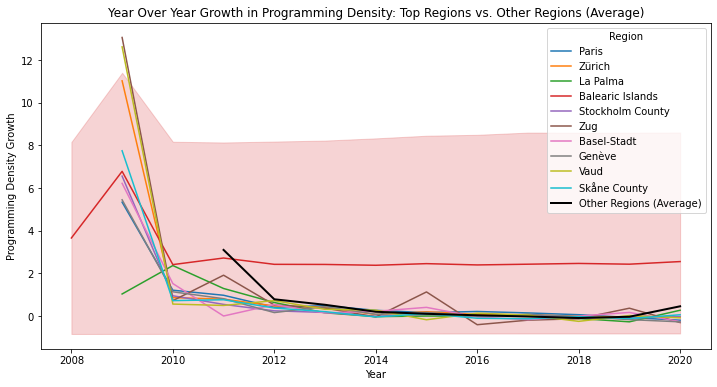

In [18]:
# Calculate Growth in Programming Density for both top regions and other regions
FINAL_no_TR['Programming_Density_Growth'] = FINAL_no_TR.groupby('nuts3_name')['Programming_Density'].pct_change()

# Extracting data for the top regions
top_regions_growth_data = FINAL_no_TR[FINAL_no_TR['nuts3_name'].isin(top_regions_list)]

# Calculating the average programming density growth per year for other regions
average_growth_other = FINAL_no_TR[~FINAL_no_TR['nuts3_name'].isin(top_regions_list)].groupby('year')['Programming_Density_Growth'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Plot for top regions growth
for region in top_regions_list:
    region_growth_data = top_regions_growth_data[top_regions_growth_data['nuts3_name'] == region]
    sns.lineplot(data=region_growth_data, x='year', y='Programming_Density_Growth', label=region, legend=False)

# Plot for average growth of other regions
sns.lineplot(data=average_growth_other, x='year', y='Programming_Density_Growth', label='Other Regions (Average)', color='black', linewidth=2)

plt.title('Year Over Year Growth in Programming Density: Top Regions vs. Other Regions (Average)')
plt.xlabel('Year')
plt.ylabel('Programming Density Growth')
plt.legend(title='Region', loc='upper right')
plt.show()

This chart shows changes in growth for many regions around the same early years, which then stabilize. The black line representing the average of other regions remains relatively flat compared to the top regions, which suggests that while the top regions have experienced significant fluctuations and growth in programming density, the other regions have not seen such dramatic changes. The steep initial growth followed by stabilisation indicates that there might have been a surge in programming interest or industry growth during those years, which then matured.

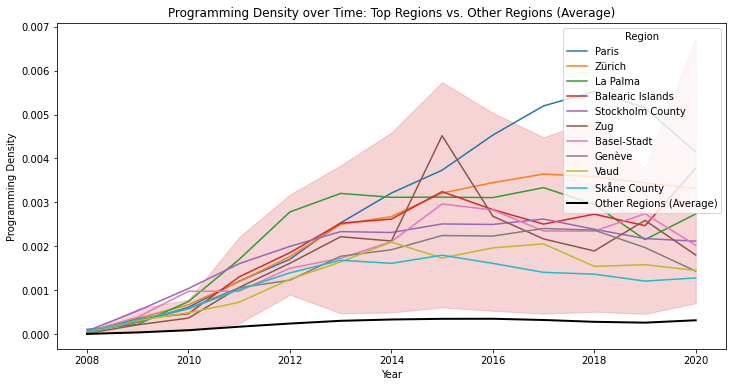

In [20]:
# Filtering the data for top regions
top_regions_data = FINAL_no_TR[FINAL_no_TR['nuts3_name'].isin(top_regions_list)]

# Calculate the average programming density for regions not in the top list
average_density_other = FINAL_no_TR[~FINAL_no_TR['nuts3_name'].isin(top_regions_list)].groupby('year')['Programming_Density'].mean().reset_index()

# Start plotting
plt.figure(figsize=(12, 6))

# Plot for each top region
for region in top_regions_list:
    region_data = top_regions_data[top_regions_data['nuts3_name'] == region]
    sns.lineplot(data=region_data, x='year', y='Programming_Density', label=region)

# Plot for average of other regions
sns.lineplot(data=average_density_other, x='year', y='Programming_Density', label='Other Regions (Average)', color='black', linewidth=2)

# Setting the title and labels
plt.title('Programming Density over Time: Top Regions vs. Other Regions (Average)')
plt.xlabel('Year')
plt.ylabel('Programming Density')
plt.legend(title='Region', loc='upper right')

# Display the plot
plt.show()


We see a steady increase in programming density for the top regions, with Paris and Stockholm County leading with the highest density towards the latest years observed. The other regions show a much flatter trend over time, which might imply that these regions have slower growth in programming activity compared to the top regions.

In [21]:
# Define top regions based on programming density
top_regions = FINAL_no_TR.groupby('nuts3_name')['Programming_Density'].mean().sort_values(ascending=False).head(10)

# Define top growing regions based on programming density growth
top_growing_regions = FINAL_no_TR.groupby('nuts3_name')['Programming_Density_Growth'].mean().sort_values(ascending=False).head(10)

# Convert to DataFrame if they are not already
top_regions_df = pd.DataFrame(top_regions)
top_growing_regions_df = pd.DataFrame(top_growing_regions)

# Identify common regions
common_regions = set(top_regions_df.index).intersection(set(top_growing_regions_df.index))

# Unique to top_regions
unique_top_regions = set(top_regions_df.index) - set(top_growing_regions_df.index)

# Unique to top_growing_regions
unique_growing_regions = set(top_growing_regions_df.index) - set(top_regions_df.index)

# Print the results
print("Common Regions:", common_regions)
print("Unique to Top Regions:", unique_top_regions)
print("Unique to Top Growing Regions:", unique_growing_regions)


Common Regions: set()
Unique to Top Regions: {'Zürich', 'Vaud', 'Balearic Islands', 'Genève', 'Paris', 'Skåne County', 'Stockholm County', 'Basel-Stadt', 'Zug', 'La Palma'}
Unique to Top Growing Regions: {'Perugia', 'Jura', 'Lucca', 'Zamora', 'Lecco', 'Pas-de-Calais', 'Meurthe-et-Moselle', 'Biella', 'Ardèche', 'Aude'}


The top regions are established hubs with a high current density of programmers. They may have a mature tech ecosystem with a higher GDP and education.

The top growing regions are witnessing significant growth in programming interest. It would be due to government incentives, the tech sector, or education.

No common regions

Common Regions between Top and Top Growing Regions: set()
Unique to Top Regions: {'Zürich', 'Vaud', 'Balearic Islands', 'Genève', 'Paris', 'Skåne County', 'Stockholm County', 'Basel-Stadt', 'Zug', 'La Palma'}
Unique to Top Growing Regions: {'Perugia', 'Jura', 'Lucca', 'Zamora', 'Lecco', 'Pas-de-Calais', 'Meurthe-et-Moselle', 'Biella', 'Ardèche', 'Aude'}


<Figure size 1080x720 with 0 Axes>

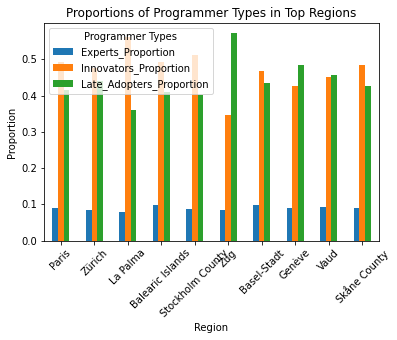

<Figure size 1080x720 with 0 Axes>

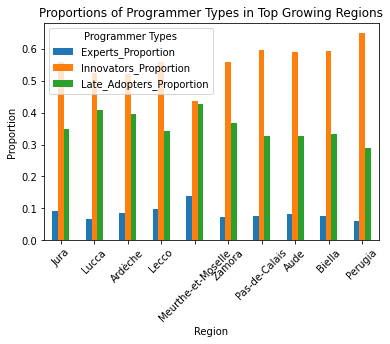

In [22]:
# Identifying Common and Unique Regions
common_regions = set(top_regions.index).intersection(set(top_growing_regions.index))
unique_to_top_regions = set(top_regions.index) - set(top_growing_regions.index)
unique_to_top_growing_regions = set(top_growing_regions.index) - set(top_regions.index)

# Displaying the Identified Regions
print("Common Regions between Top and Top Growing Regions:", common_regions)
print("Unique to Top Regions:", unique_to_top_regions)
print("Unique to Top Growing Regions:", unique_to_top_growing_regions)

# Function to Calculate Proportions (Updated to Avoid Redefinition)
def calculate_proportions(region_name):
    region_data = FINAL_no_TR[FINAL_no_TR['nuts3_name'] == region_name]
    total_programmers = region_data['Programmers_Total'].sum()
    experts_proportion = region_data['Experts'].sum() / total_programmers if total_programmers else 0
    innovators_proportion = region_data['Innovators'].sum() / total_programmers if total_programmers else 0
    late_adopters_proportion = region_data['Late_Adopters'].sum() / total_programmers if total_programmers else 0
    
    return {
        'Experts_Proportion': experts_proportion,
        'Innovators_Proportion': innovators_proportion,
        'Late_Adopters_Proportion': late_adopters_proportion
    }

# Calculating Proportions for Top and Top Growing Regions
top_regions_proportions = {region: calculate_proportions(region) for region in top_regions.index}
top_growing_regions_proportions = {region: calculate_proportions(region) for region in top_growing_regions.index}

# Convert to DataFrames for Plotting
df_top_regions = pd.DataFrame.from_dict(top_regions_proportions, orient='index')
df_top_growing_regions = pd.DataFrame.from_dict(top_growing_regions_proportions, orient='index')

# Plotting
plt.figure(figsize=(15, 10))
df_top_regions.plot(kind='bar', stacked=False)
plt.title('Proportions of Programmer Types in Top Regions')
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Programmer Types')
plt.show()

plt.figure(figsize=(15, 10))
df_top_growing_regions.plot(kind='bar', stacked=False)
plt.title('Proportions of Programmer Types in Top Growing Regions')
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Programmer Types')
plt.show()


The findings from the bar chart give us insights into the programming communities in the top and growing regions:
The high contribution of innovators in the top-growing regions may suggest that those regions might be experiencing a growth in programming interest.
The high contribution of experts in the top regions indicates mature community hubs that also might have better job opportunities, tech hubs, and higher programming education.

In [23]:
# Extract Programming Density for Top Regions
top_regions_density = FINAL_no_TR[FINAL_no_TR['nuts3_name'].isin(top_regions.index)].groupby('nuts3_name')['Programming_Density'].mean()

# Extract Programming Density for Top Growing Regions
top_growing_regions_density = FINAL_no_TR[FINAL_no_TR['nuts3_name'].isin(top_growing_regions.index)].groupby('nuts3_name')['Programming_Density'].mean()

# Combine the density data with the proportions data
df_top_regions['Programming_Density'] = df_top_regions.index.map(top_regions_density)
df_top_growing_regions['Programming_Density'] = df_top_growing_regions.index.map(top_growing_regions_density)

# Correlate Innovators Proportion with Programming Density for Top Regions
top_regions_correlation = df_top_regions[['Innovators_Proportion', 'Programming_Density']].corr().iloc[0, 1]

# Correlate Innovators Proportion with Programming Density for Top Growing Regions
top_growing_regions_correlation = df_top_growing_regions[['Innovators_Proportion', 'Programming_Density', 'Experts_Proportion']].corr().iloc[0, 1]

# Display the results
print("Correlation in Top Regions:", top_regions_correlation)
print("Correlation in Top Growing Regions:", top_growing_regions_correlation)

Correlation in Top Regions: 0.3510450261798541
Correlation in Top Growing Regions: -0.4500798088976688


## Predicitve Variables Based on Economic Factors and Programming Communities:
Economic factors (GDP, GVA, employment, and GDP per capita) are significant predictors, but their influence varies by country or region.
Communities of programmers such as Expers, Innovators, and Late Adopters are also good predictive variables. The top-growing regions tend to have a higher proportion of innovators, suggesting these areas might be experiencing growth in programming interest and technological adoption. In contrast, the top regions have more experts, indicating more established and mature programming communities.
Country-specific regression models revealed that the impact of economic variables on programming density varies significantly across different countries. This indicates that local economic conditions and possibly cultural factors play a crucial role in determining programming density.

### Modeling
Based on the above best variables we will try to model linear regression model for target variable Programmning_Density. In this part we will examine the perforamce of each feacture and prot residual plots for that.

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge 
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [79]:
# Filtering the data for top regions
top_regions_data = FINAL_no_TR[FINAL_no_TR['nuts3_name'].isin(top_regions_list)]

# Selecting features for the model
features = ['GDP_per_capita', 'Experts', 'Innovators']  # Add more features as needed
X_top_regions = top_regions_data[features]
y_top_regions = top_regions_data['Programming_Density']

# Adding a constant for the intercept
X_top_regions = sm.add_constant(X_top_regions)

# Building the model
model_top_regions = sm.OLS(y_top_regions, X_top_regions).fit()
print(model_top_regions.summary())


                             OLS Regression Results                            
Dep. Variable:     Programming_Density   R-squared:                       0.249
Model:                             OLS   Adj. R-squared:                  0.234
Method:                  Least Squares   F-statistic:                     16.76
Date:                 Thu, 23 Nov 2023   Prob (F-statistic):           1.86e-09
Time:                         14:36:32   Log-Likelihood:                 825.12
No. Observations:                  156   AIC:                            -1642.
Df Residuals:                      152   BIC:                            -1630.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0016      0.0

In [80]:
# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_top_regions.columns
vif_data["VIF"] = [variance_inflation_factor(X_top_regions.values, i) for i in range(len(X_top_regions.columns))]

print(vif_data)

          feature        VIF
0           const   3.521345
1  GDP_per_capita   1.048563
2         Experts  11.961665
3      Innovators  11.930226


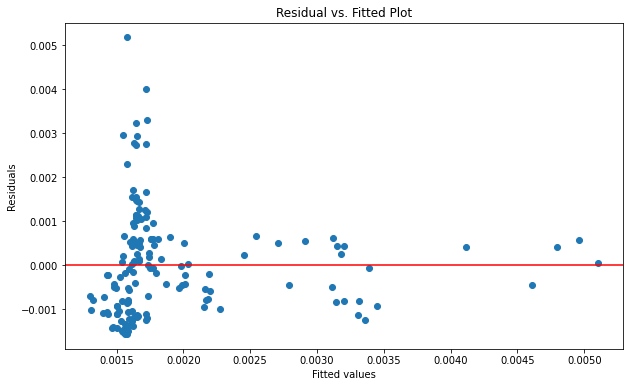

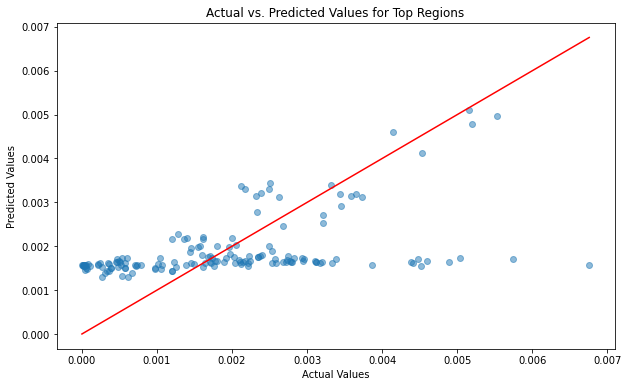

In [81]:
# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(model_top_regions.fittedvalues, model_top_regions.resid)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual vs. Fitted Plot')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_top_regions, model_top_regions.fittedvalues, alpha=0.5)
plt.plot([y_top_regions.min(), y_top_regions.max()], [y_top_regions.min(), y_top_regions.max()], color='red') # Line for perfect fit
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Top Regions')
plt.show()

The above results are our first model. There was an issue with high values in VIF.

We will use weigth to the Stack Overflow activities that might give us a better result. We used the weigth defined in modeling_Nils notebook on Github for that

In [82]:
# Assign weights to different types of SO activity
weights = {'questions': 0.4, 'answers': 0.4, 'comments': 0.1, 'upvotes': 0.05, 'downvotes': 0.05}

# Calculate the weighted activity score
FINAL_no_TR['weighted_activity'] = (FINAL_no_TR['questioncount'] * weights['questions'] + 
                                    FINAL_no_TR['answercount'] * weights['answers'] + 
                                    FINAL_no_TR['commentcount'] * weights['comments'] + 
                                    FINAL_no_TR['upvotecount'] * weights['upvotes'] + 
                                    FINAL_no_TR['downvotecount'] * weights['downvotes'])

# Then you can normalize this activity score per capita if needed
FINAL_no_TR['activity_per_capita'] = FINAL_no_TR['weighted_activity'] / (FINAL_no_TR['POP (THS)'] * 1000)

# Now, you can include this new feature in your linear regression model
X = FINAL_no_TR[['GDP_per_capita', 'activity_per_capita']]
y = FINAL_no_TR['Programming_Density']
X = sm.add_constant(X)

# Fitting the model with the new feature
model_with_activity = sm.OLS(y, X).fit()

# Viewing the summary of the new model
print(model_with_activity.summary())

                             OLS Regression Results                            
Dep. Variable:     Programming_Density   R-squared:                       0.970
Model:                             OLS   Adj. R-squared:                  0.970
Method:                  Least Squares   F-statistic:                 6.442e+04
Date:                 Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                         14:36:33   Log-Likelihood:                 31333.
No. Observations:                 3952   AIC:                        -6.266e+04
Df Residuals:                     3949   BIC:                        -6.264e+04
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9.9

In [83]:
# Calculate VIF for the new model
X = FINAL_no_TR[['GDP_per_capita', 'activity_per_capita']]
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

               Feature       VIF
0                const  5.004899
1       GDP_per_capita  1.461682
2  activity_per_capita  1.461682


In [84]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training set
model_train = sm.OLS(y_train, X_train).fit()

# Predict on the test set
y_pred = model_train.predict(X_test)

# Evaluate the model (for example, using RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE:', rmse)

Test RMSE: 0.00010324532641402529


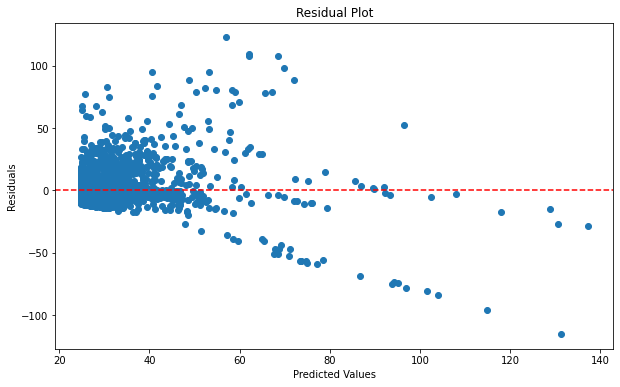

In [85]:
predictions = model.fittedvalues
residuals = model.resid

# Creating the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

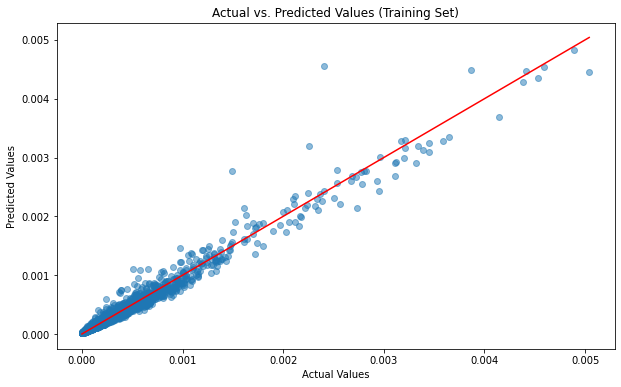

In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, model_train.predict(X_train), alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red') # Line for perfect fit
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Training Set)')
plt.show()

The above model is much better, using less feacture and VIF values are around 1, which indicates that the model is good. Also the Residual Plot show a propocianly distributed values around the values 0. 

Next, modeling for GDP per capita and per population size

In [87]:
bins = [0, 100000, 500000, np.inf]
labels = ['small', 'medium', 'large']
FINAL_no_TR['population_cohort'] = pd.cut(FINAL_no_TR['POP (THS)'], bins=bins, labels=labels)

# Creating dummy variables for the population cohorts
population_dummies = pd.get_dummies(FINAL_no_TR['population_cohort'], drop_first=True)

# Merging the dummy variables with the main DataFrame
FINAL_no_TR = pd.concat([FINAL_no_TR, population_dummies], axis=1)

FINAL_no_TR

,year,nuts3_name,country,questioncount,answercount,upvotecount,downvotecount,commentcount,nuts3_code,EMP (THS),...,weighted_activity,activity_per_capita,population_cohort,year_numeric,medium,large,medium,large,medium,large
0,2008,Aargau,CH,86,167,0,0,32,CH033,349.067,...,104.40,0.000178,small,0,0,0,0,0,0,0
1,2009,Aargau,CH,370,2291,4158,265,3282,CH033,349.067,...,1613.75,0.002708,small,1,0,0,0,0,0,0
2,2010,Aargau,CH,1658,4073,12602,474,7459,CH033,349.067,...,3692.10,0.006111,small,2,0,0,0,0,0,0
3,2011,Aargau,CH,1876,6039,16410,2362,13563,CH033,348.695,...,5460.90,0.008881,small,3,0,0,0,0,0,0
4,2012,Aargau,CH,3226,6260,24401,4175,18513,CH033,355.344,...,7074.50,0.011359,small,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3947,2016,Östergötland County,SE,4512,3147,18061,1583,14559,SE123,212.000,...,5501.70,0.012253,small,8,0,0,0,0,0,0
3948,2017,Östergötland County,SE,3633,3263,16235,1506,11172,SE123,217.000,...,4762.65,0.010468,small,9,0,0,0,0,0,0
3949,2018,Östergötland County,SE,3683,2516,19716,1875,14176,SE123,224.000,...,4976.75,0.010819,small,10,0,0,0,0,0,0
3950,2019,Östergötland County,SE,2957,2037,19970,1243,9206,SE123,226.000,...,3978.85,0.008575,small,11,0,0,0,0,0,0


In [88]:
# Assuming 'year' is a column in your DataFrame FINAL_no_TR
FINAL_no_TR['year_numeric'] = FINAL_no_TR['year'] - FINAL_no_TR['year'].min()

# Selecting predictors for the model
X = FINAL_no_TR[['year_numeric', 'GDP_per_capita', 'activity_per_capita', 'EMP (THS)', 'medium', 'large']]

# Target variable
y = FINAL_no_TR['Programming_Density']

# Adding a constant for the intercept
X = sm.add_constant(X)

# Building the model
model1 = sm.OLS(y, X).fit()

# Viewing the summary of the model
print(model1.summary())

                             OLS Regression Results                            
Dep. Variable:     Programming_Density   R-squared:                       0.972
Model:                             OLS   Adj. R-squared:                  0.972
Method:                  Least Squares   F-statistic:                 3.485e+04
Date:                 Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                         14:36:36   Log-Likelihood:                 31485.
No. Observations:                 3952   AIC:                        -6.296e+04
Df Residuals:                     3947   BIC:                        -6.293e+04
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.8

/Users/juliabak/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


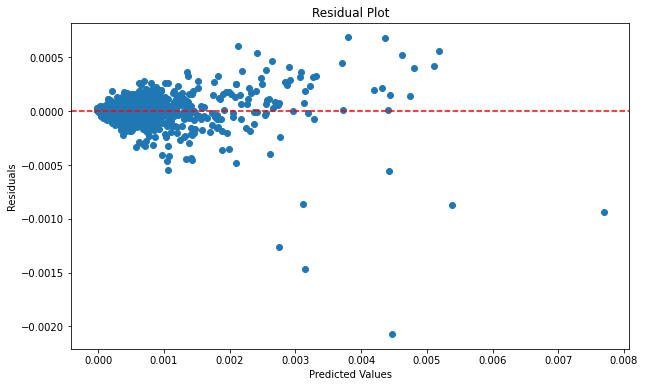

In [89]:
predictions = model1.fittedvalues
residuals = model1.resid

# Creating the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [90]:
X = FINAL_no_TR[['year_numeric', 'GDP_per_capita', 'activity_per_capita', 'EMP (THS)', 'medium', 'large']]
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                Feature       VIF
0                 const  7.672144
1          year_numeric  1.043899
2        GDP_per_capita  1.476899
3   activity_per_capita  1.530609
4             EMP (THS)  1.055831
5                medium       NaN
6                medium       NaN
7                medium       NaN
8                 large       NaN
9                 large       NaN
10                large       NaN


/Users/juliabak/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Althougt, the features in VIF have small values, there is an issue on the Residul Plot showing an issue with the disstribution. This distribution indicates that the lieanr model is not a good fit for the dataset.

In [91]:
# Define your features and target variable
X = FINAL_no_TR[['year_numeric', 'GDP_per_capita', 'activity_per_capita', 'EMP (THS)', 'medium', 'large']]  
y = FINAL_no_TR['Programming_Density']

# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)

# Fit the model
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_model.predict(X_test)

In [92]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Root Mean Squared Error: 0.00046165249692138274
R^2 Score: 0.4516025713265003


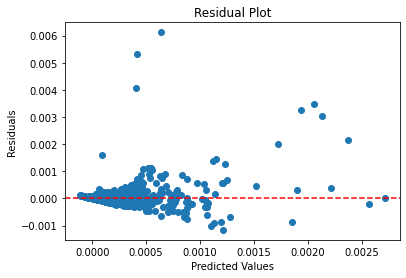

In [93]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
